In [1]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 현재 디렉토리 경로
os.getcwd()

'E:\\Python_Project\\fastcamp\\강의자료\\part3--이미지-분석으로-배우는-tensorflow-2.0과-pytorch\\Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch\\해설 코드'

In [3]:
# 현재 디렉토리 파일 목록
os.listdir() 

['.ipynb_checkpoints',
 'checkpoint.pt',
 'checkpoints',
 'ckpt',
 'logs',
 'model.pt',
 'model_architecture.json',
 'model_weight.pt',
 'model_weights.h5',
 'my_model.h5',
 'puppy.jpg',
 'runs',
 'samplesubmission.csv',
 'test01.ipynb',
 'test_dataset.csv',
 'train_dataset.csv',
 '[해설]02~03. Preprocess - 01~02.데이터_준비하기~이미지 분석_.ipynb',
 '[해설]04.Preprocess - 03.데이터의_학습에_대한_이해.ipynb',
 '[해설]05.tensorflow 2.0 - 01.fit_generator_Image_Transformation.ipynb',
 '[해설]06.tensorflow 2.0 - 02.fit_generator_flow_from_directory.ipynb',
 '[해설]07~08.tensorflow 2.0 - 03~04.flow_from_dataframe_dataframe_만들기.ipynb',
 '[해설]09.tensorflow 2.0 - 05.flow_from_dataframe_dataframe_적용하여_학습_시키기.ipynb',
 '[해설]10~11.tensorflow 2.0 - 06~07.tf_data_load_image___make_batch.ipynb',
 '[해설]12. callbacks - learning rate schedule.ipynb',
 '[해설]13~14.tensorflow 2.0 - 09~10.callbacks_tensorboard.ipynb',
 '[해설]15.tensorflow 2.0 - 11.callbacks_learning_rate_schedule.ipynb',
 '[해설]16.tensorflow 2.0 - 12.callbacks_model_checkpo

In [4]:
os.listdir('../dataset/')

['cactus', 'cactus.zip', 'cifar', 'cifar.zip', 'mnist_png', 'mnist_png.zip']

In [5]:
os.listdir('../dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
os.listdir('../dataset/mnist_png/training/0/')[0]

'1.png'

In [7]:
# glob는 경로까지 포함해서 돌려줌
data_paths = glob('../dataset/mnist_png/training/*/*.png')
data_paths[0]

'../dataset/mnist_png/training\\0\\1.png'

In [8]:
path = data_paths[0]
path

'../dataset/mnist_png/training\\0\\1.png'

# 데이터 분석 

In [9]:
len(data_paths)

60000

In [10]:
os.listdir('../dataset/mnist_png/training')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [11]:
label_nums = os.listdir('../dataset/mnist_png/training')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label 0의 데이터 갯수 확인

In [12]:
len(os.listdir('../dataset/mnist_png/training/' + '0'))

5923

### 데이터 별 갯수 비교

In [13]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('../dataset/mnist_png/training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

In [14]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [15]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

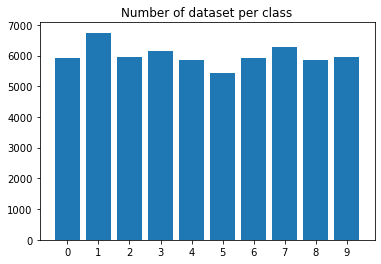

In [16]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of dataset per class')
plt.show()

# Pillow로 열기

In [17]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [18]:
image.shape

(28, 28)

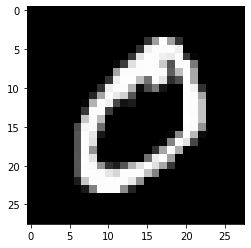

In [19]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [20]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [21]:
image.shape

TensorShape([28, 28, 1])

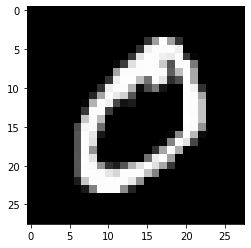

In [22]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

# Label 얻기

In [23]:
path

'../dataset/mnist_png/training\\0\\1.png'

In [24]:
path.split('\\')

['../dataset/mnist_png/training', '0', '1.png']

In [25]:
cls_n = path.split('\\')[-2]
cls_n

'0'

In [26]:
int(cls_n)

0

In [27]:
def get_label(path):
    cls_n = path.split('\\')[-2]
    return int(cls_n)

In [28]:
lbl = get_label(path)
lbl

0

# 데이터 이미지 사이즈 알기

In [29]:
from tqdm.notebook import tqdm

In [30]:
heights = []
widths = []

for path in tqdm(data_paths):
    image_pil = Image.open(path)
    image = np.array(image_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)


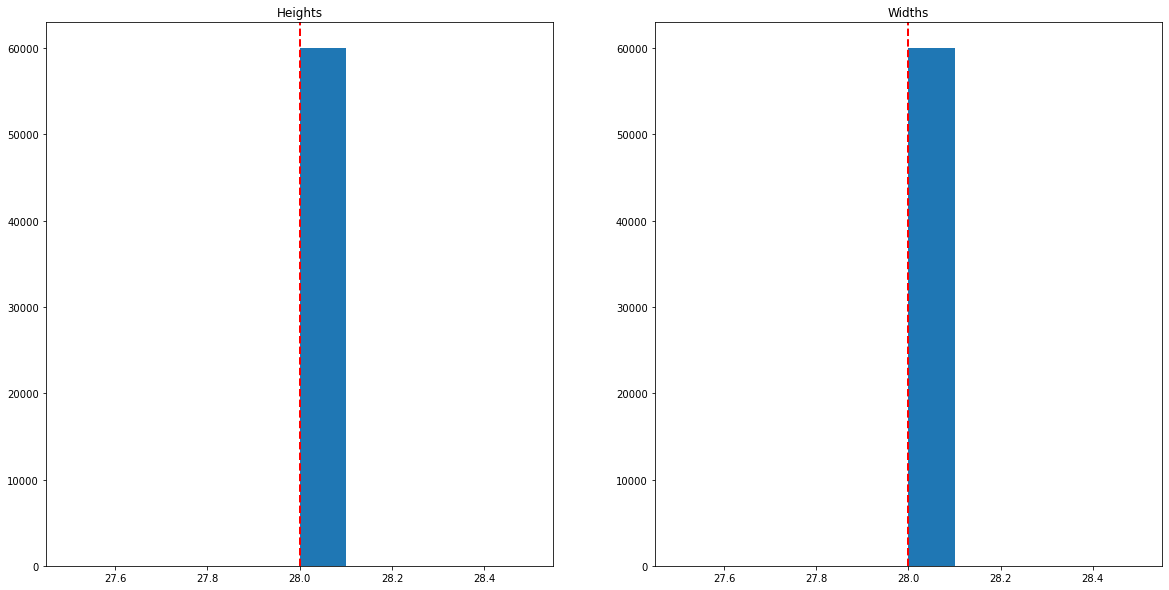

In [31]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()